In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = df.rename(columns={'v1':'target','v2':'message'})
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.duplicated().sum()

np.int64(403)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(5169, 2)

In [11]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
import matplotlib.pyplot as plt

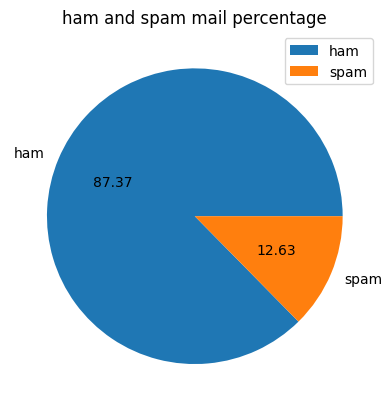

In [15]:
plt.title('ham and spam mail percentage')
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct='%0.2f')
plt.legend()
plt.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['num_character'] = df['message'].apply(len)
df.head()

,target,message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df['num_word'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,message,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_sentence'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,message,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,target,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
#ham messages
df[df['target'] == 0].describe()

,target,num_character,num_word,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
#spam messages
df[df['target'] == 1].describe()

,target,num_character,num_word,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

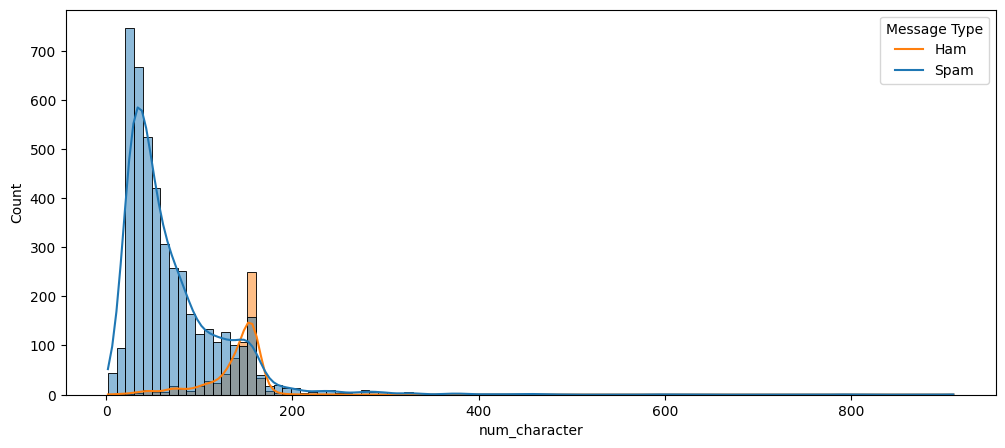

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='num_character', hue='target', kde = True)
plt.legend(title='Message Type', labels=['Ham', 'Spam'])
plt.show()

In [25]:
hum = df[df['target'] == 0]
spam = df[df['target'] == 1]

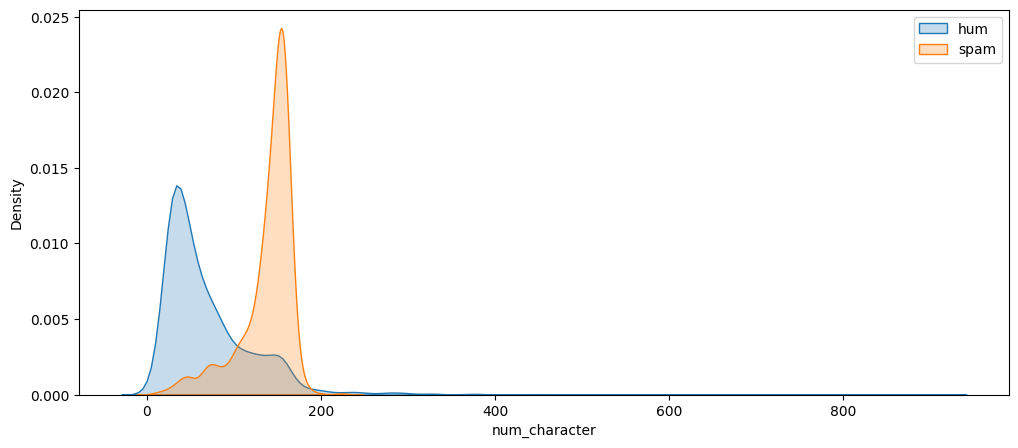

In [26]:
plt.figure(figsize=(12,5))
sns.kdeplot(hum['num_character'], fill=True, label = 'hum')
sns.kdeplot(spam['num_character'], fill=True, label = 'spam')
plt.legend()
plt.show()

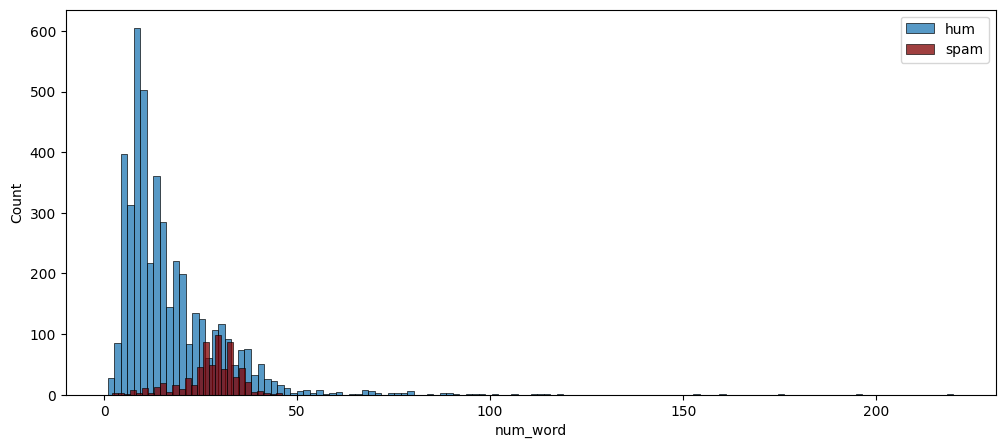

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_word'], fill=True, label = 'hum')
sns.histplot(df[df['target']==1]['num_word'], fill=True, label = 'spam', color='maroon')
plt.legend()
plt.show()

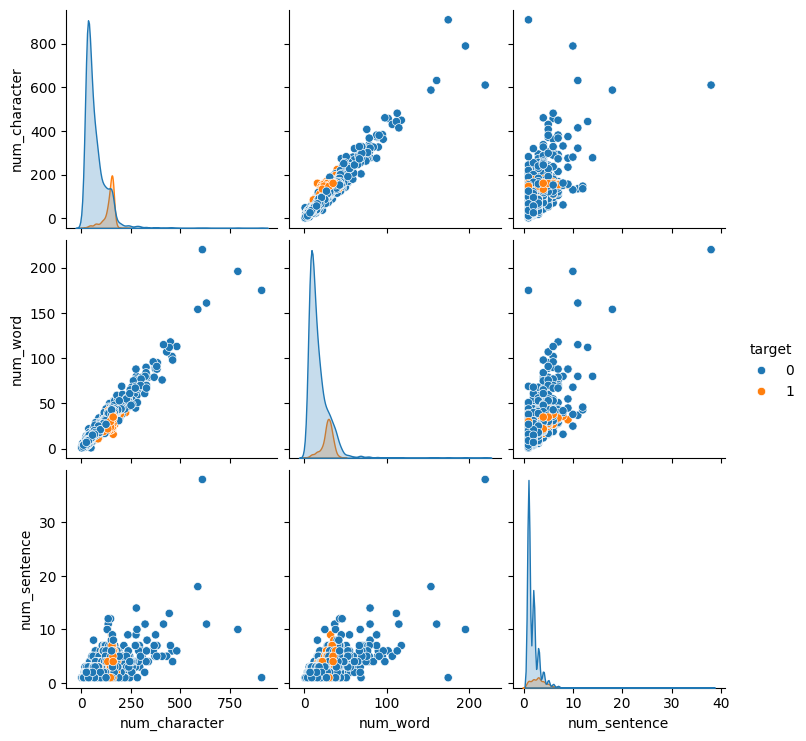

In [28]:
sns.pairplot(data = df, hue='target')
plt.show()

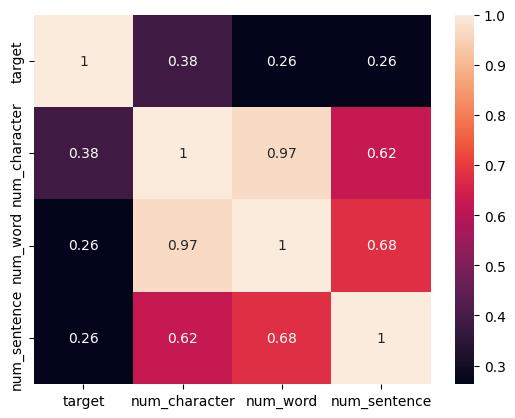

In [29]:
corr = df[['target','num_character','num_word','num_sentence']].corr()
sns.heatmap(corr, annot = True)
plt.show()

<h1>Data Preprocessing</h1>
<ul>
    <li>Lower case</li>
    <li>Tokenization</li>
    <li>Removing special character</li>
    <li>Removing stop words and punctuation</li>
    <li>Stemming</li>
</ul>

In [30]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()


def trans_case(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    x = []
    for i in tokens:
        if i.isalnum():
            x.append(i)

    y = []
    for i in x:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    z = []
    for i in y:
        word = ps.stem(i)
        z.append(word)

    return ' '.join(z)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
string.punctuation
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
df['transformed_text'] = df['message'].apply(trans_case)

In [33]:
df.head()

,target,message,num_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud

In [35]:
wc = WordCloud()

In [36]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

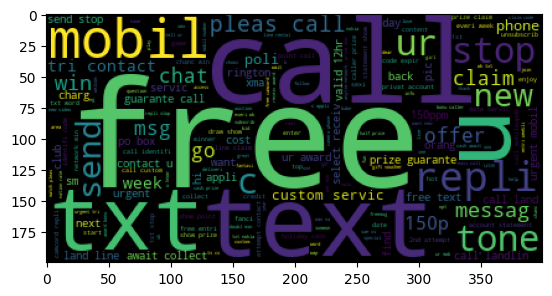

In [37]:
plt.imshow(spam_wc)
plt.show()

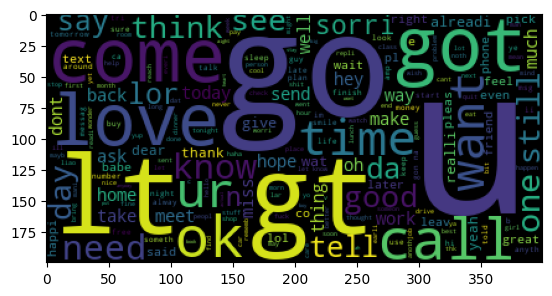

In [38]:
hum_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(hum_wc)
plt.show()

In [39]:
spam_corpus = [] #spam
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
from collections import Counter

In [42]:
spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam_word', 'spam_count'])
spam

,spam_word,spam_count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [43]:
ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham_word', 'ham_count'])
ham

,ham_word,ham_count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


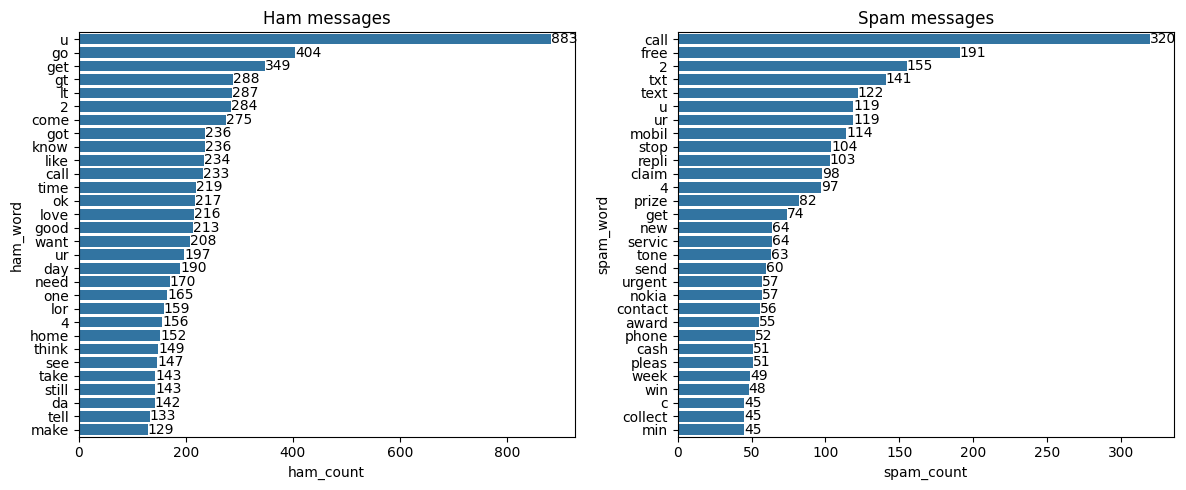

In [44]:
plt.figure(figsize=(12,5))

# Ham messages
plt.subplot(1,2,1)
plt.title('Ham messages')
ax1 = sns.barplot(data=ham, y='ham_word', x='ham_count')
ax1.bar_label(ax1.containers[0])

# Spam messages
plt.subplot(1,2,2)
plt.title('Spam messages')
ax2 = sns.barplot(data=spam, y='spam_word', x='spam_count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
cv = CountVectorizer()

In [47]:

tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [52]:
X_train.shape, y_train.shape

((4135, 3000), (4135,))

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report

In [54]:
def report(ytest, ypred):
    print('Confusion Metrix\n', confusion_matrix(ytest, ypred))
   # print('---------------------------------------------------')
#    print('Classifiction Report\n', classification_report(ytest, ypred))
    print('---------------------------------------------------')
    print('Accuracy Score\n', accuracy_score(ytest, ypred))
    print('---------------------------------------------------')    
    print('Precsion Scor\n', precision_score(ytest, ypred))

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[790 106]
 [ 24 114]]
---------------------------------------------------
Accuracy Score
 0.874274661508704
---------------------------------------------------
Precsion Scor
 0.5181818181818182


In [57]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[896   0]
 [ 30 108]]
---------------------------------------------------
Accuracy Score
 0.9709864603481625
---------------------------------------------------
Precsion Scor
 1.0


In [58]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[895   1]
 [ 16 122]]
---------------------------------------------------
Accuracy Score
 0.9835589941972921
---------------------------------------------------
Precsion Scor
 0.991869918699187


In [59]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [60]:
dt = DecisionTreeClassifier(random_state = 40)
ex = ExtraTreeClassifier(random_state = 40)
rf = RandomForestClassifier(n_estimators = 80, random_state=40)
ab = AdaBoostClassifier(n_estimators =80)
xg = XGBClassifier(n_estimators = 80, gamma = 2)
svc = SVC(kernel='sigmoid', gamma=1, probability=True)

<h1>DecisionTree</h1>

In [61]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[869  27]
 [ 24 114]]
---------------------------------------------------
Accuracy Score
 0.9506769825918762
---------------------------------------------------
Precsion Scor
 0.8085106382978723


<h1>ExtraTree</h1>

In [62]:
ex.fit(X_train, y_train)
y_pred = ex.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[869  27]
 [ 26 112]]
---------------------------------------------------
Accuracy Score
 0.9487427466150871
---------------------------------------------------
Precsion Scor
 0.8057553956834532


<h1>RendomForest</h1>

In [63]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[894   2]
 [ 21 117]]
---------------------------------------------------
Accuracy Score
 0.9777562862669246
---------------------------------------------------
Precsion Scor
 0.9831932773109243


<h1>AdaBoost</h1>

In [64]:
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[880  16]
 [ 60  78]]
---------------------------------------------------
Accuracy Score
 0.9264990328820116
---------------------------------------------------
Precsion Scor
 0.8297872340425532


<h1>XGBoost</h1>

In [65]:
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[891   5]
 [ 25 113]]
---------------------------------------------------
Accuracy Score
 0.9709864603481625
---------------------------------------------------
Precsion Scor
 0.9576271186440678


In [66]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[893   3]
 [ 22 116]]
---------------------------------------------------
Accuracy Score
 0.9758220502901354
---------------------------------------------------
Precsion Scor
 0.9747899159663865


In [67]:
from sklearn.ensemble import VotingClassifier

In [68]:
voting = VotingClassifier(
    estimators=[('svm', svc),('nb', mnb),('rf', rf)],voting = 'soft'
)

In [69]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
report(y_test, y_pred)

Confusion Metrix
 [[894   2]
 [ 19 119]]
---------------------------------------------------
Accuracy Score
 0.9796905222437138
---------------------------------------------------
Precsion Scor
 0.9834710743801653


In [70]:
import pickle

In [74]:
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))
pickle.dump(trans_case, open('transforming.pkl','wb'))